## Analyse der bereinigten Daten 

In [ ]:
# descriptive Statistik

import pandas as pd

df = pd.read_csv('../../Data/processed/wasser_cleaning/alle_staedte.csv', sep=';')
df = df.drop('Year', axis=1)

print(df.describe().round(2))

   Chemnitz  Dortmund  Erfurt  Munich G  Nuremberg  Saarbrücken (2)
0    356.29    305.04  506.30    200.63     161.80           167.51
1    103.20    478.59  193.70    241.11     130.55           209.10
2    306.62    352.89  304.72    250.51     194.27           195.67
3    404.10    547.65  454.46    315.82     271.59           246.52
4    419.48    480.76  453.56    426.50     266.79           287.88
       Chemnitz  Dortmund  Erfurt  Munich G  Nuremberg  Saarbrücken (2)
count      5.00      5.00    5.00      5.00       5.00             5.00
mean     317.94    432.99  382.55    286.91     205.00           221.34
std      127.91    100.37  129.66     88.30      62.80            46.82
min      103.20    305.04  193.70    200.63     130.55           167.51
25%      306.62    352.89  304.72    241.11     161.80           195.67
50%      356.29    478.59  453.56    250.51     194.27           209.10
75%      404.10    480.76  454.46    315.82     266.79           246.52
max      419.48 

In [67]:
stadt_mean = df.mean()
gesamt_mean = stadt_mean.mean()

# Berechnung (wie zuvor)
total_mean = stadt_mean.mean()

# Überschrift drucken (mit Tabulatoren getrennt)
print(f"Stadt\t\tMittelwert\tAbweichung\tStatus")
print("-" * 70) # Eine Trennlinie sieht immer gut aus

# Durch jede Stadt iterieren
for city, mean in stadt_mean.items():
    # Abweichung berechnen
    diff = mean - total_mean
    
    # Status bestimmen
    if mean > total_mean:
        status = "Über Schnitt" 
    else:
        status= "Unter Schnitt"
    
    # Ausgabe mit \t (Tabulator)
    # :.2f  bedeutet: Runde auf 2 Kommastellen
    # :+.2f bedeutet: Runde auf 2 Stellen UND erzwinge ein Vorzeichen (+/-)
    print(f"{city}\t{mean:.2f}\t\t{diff:+.2f}\t\t{status}")

TypeError: Could not convert ['ChemnitzChemnitzChemnitzChemnitzChemnitzDortmundDortmundDortmundDortmundErfurtErfurtErfurtErfurtErfurtMünchenMünchenMünchenMünchenMünchenNuernbergNuernbergNuernbergNuernbergNuernbergSaarbrueckenSaarbrueckenSaarbrueckenSaarbrueckenSaarbruecken'] to numeric

# Vergleich des Drogenkonsums in den Städten 

> **Visualisierung:** Grafik erstellt mit:  [Datawrapper](https://www.datawrapper.de/).

### Erkenntnisse


* **Der "Corona-Knick" (2021)**
    In mehreren Städten ist im Jahr 2021 ein deutlicher Einbruch der Konsumwerte zu sehen. Dieser Rückgang könnte auf die öffentlichen Einschränkungen zur Eindämmung der COVID-19-Pandemie zurückzuführen sein.

* **Allgemeiner Aufwärtstrend**
    Abgesehen von dem temporären Einbruch zeigt sich ein allgemeiner Anstieg des Drogenkonsums über die Jahre.
    * *Ausnahme:* Lediglich **Erfurt** weicht von diesem Muster ab und zeigt einen geringen Rückgang.

### Grenzen der Interpretation

Trotz dieser sichtbaren Muster ist eine tiefergehende Ursachenforschung problematisch, da kaum weitere Datenquellen zur Verfügung stehen

![0aqHR-miligramm-pro-1000-einwohner-innen-nbsp- (1).png](<attachment:0aqHR-miligramm-pro-1000-einwohner-innen-nbsp- (1).png>)

In [68]:
#Code vom Hypothesentest zur Dataset-Zusammenfügung 

konsum = pd.read_csv("../../Data/processed//wasser_cleaning/alle_staedte.csv", sep=";")
berichte = pd.read_csv("../../statistik/prozentuale_aenderung_blaulicht_drogen_tf-idf.csv", sep=";", decimal=",")

# Wide-Format → Long-Format
konsum_long = konsum.melt(
    id_vars="Year",            # Zeitvariable behalten
    var_name="Stadt",          # Städtenamen aus Spalten
    value_name="Konsum_mg_tag" # Messwert: Drogenkonsum
)

# Einheitliche Jahresbezeichnung
konsum_long = konsum_long.rename(columns={"Year": "Jahr"})

# Fehlende Konsumwerte entfernen
konsum_long = konsum_long.dropna()

# Städtenamen vereinheitlichen (Merge-Kompatibilität)
konsum_long["Stadt"] = konsum_long["Stadt"].replace({
    "Munich G": "München",
    "Nuremberg": "Nuernberg",
    "Saarbrücken (2)": "Saarbruecken"
})

# Relevante Variablen aus Berichte-Datensatz filtern
berichte_sub = berichte[["Stadt", "Jahr", "Frequenz_Prozent"]].dropna()

# Zusammenführen beider Datensätze (Stadt × Jahr)
df = pd.merge(
    konsum_long,
    berichte_sub,
    on=["Stadt", "Jahr"],
    how="inner"           # nur vollständige Beobachtungen
)

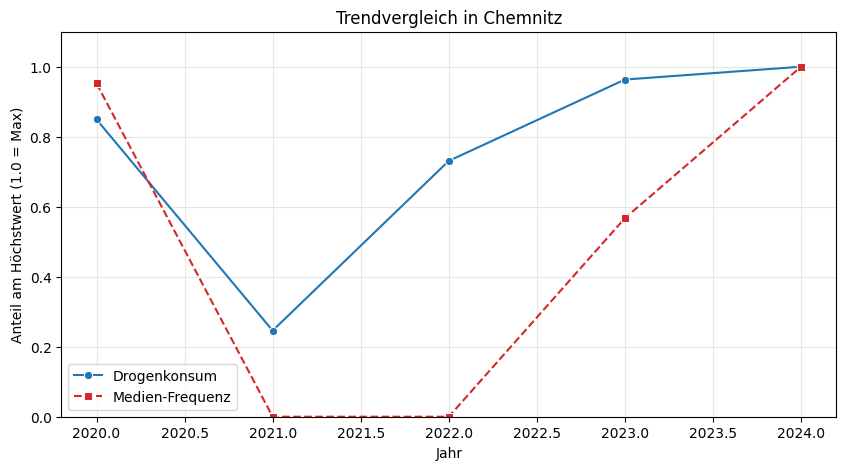

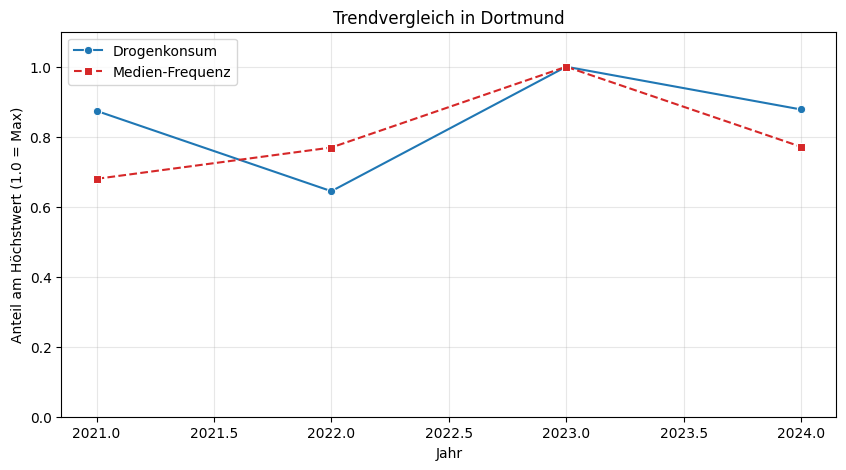

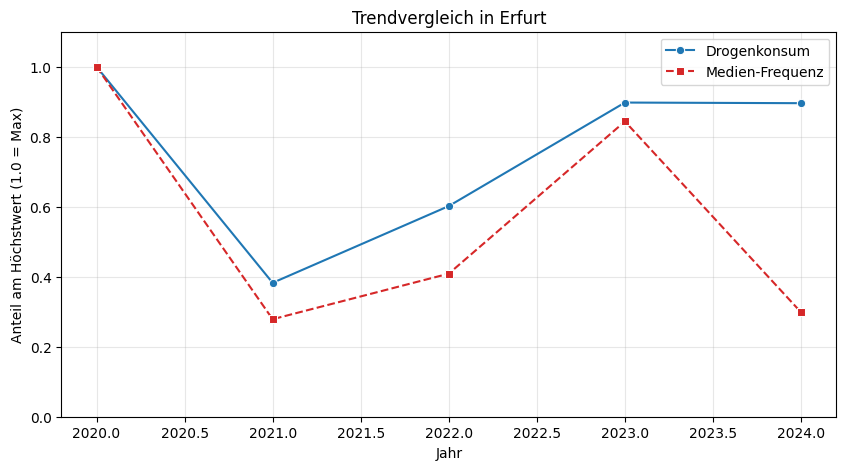

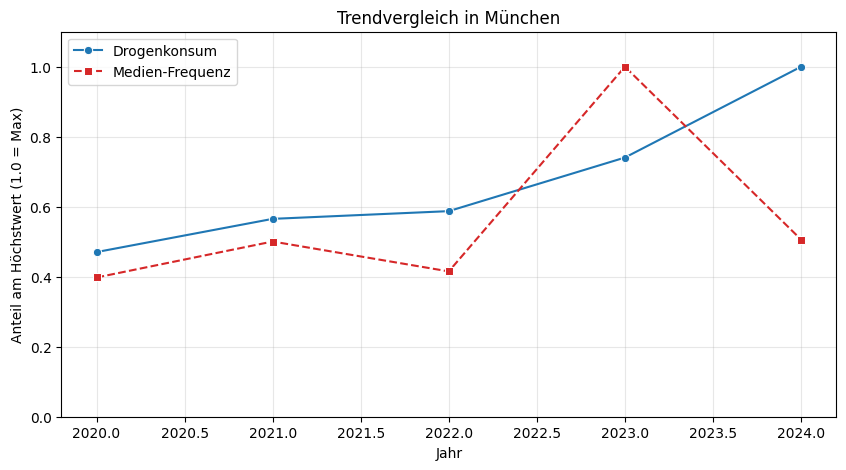

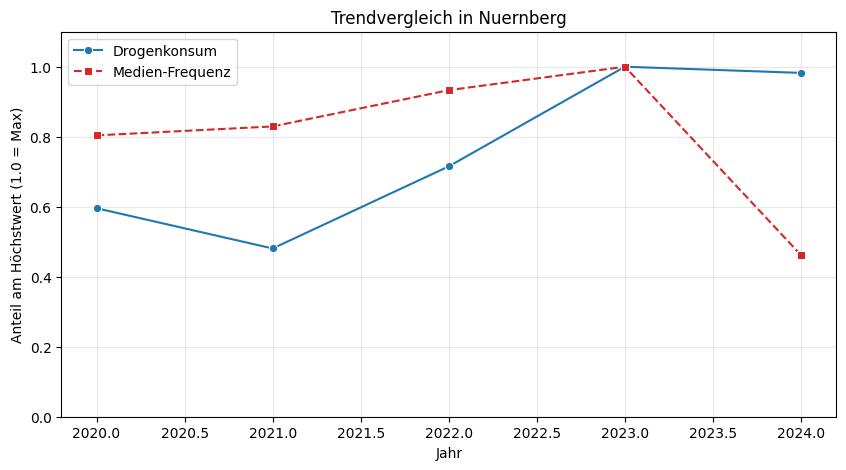

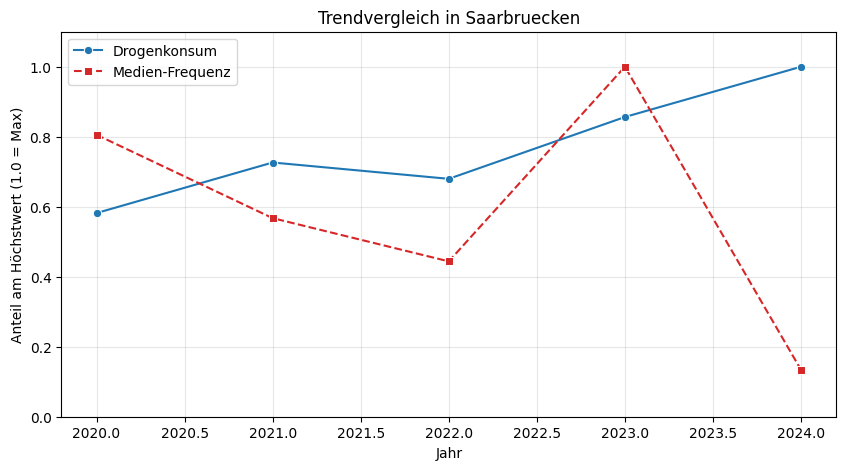

In [61]:
# --- Ersetze den Skalierungs-Block hiermit ---

# Wir teilen durch das Maximum -> Der niedrigste Wert bleibt verhältnismäßig erhalten
# und fällt nicht künstlich auf 0.
df["Konsum_norm"] = df.groupby("Stadt")["Konsum_mg_tag"].transform(lambda x: x / x.max())
df["Medien_norm"] = df.groupby("Stadt")["Frequenz_Prozent"].transform(lambda x: x / x.max())

# --- Plotting Teil (kleine Anpassung im Label) ---
import matplotlib.pyplot as plt
import seaborn as sns

for stadt in df["Stadt"].unique():
    data_stadt = df[df["Stadt"] == stadt]
    
    plt.figure(figsize=(10, 5))
    
    sns.lineplot(data=data_stadt, x="Jahr", y="Konsum_norm", marker="o", label="Drogenkonsum", color="tab:blue")
    sns.lineplot(data=data_stadt, x="Jahr", y="Medien_norm", marker="s", label="Medien-Frequenz", color="tab:red", linestyle="--")
    
    plt.title(f"Trendvergleich in {stadt}")
    plt.ylabel("Anteil am Höchstwert (1.0 = Max)")
    plt.ylim(0, 1.1) # Y-Achse fängt trotzdem bei 0 an, damit man die Höhe richtig einschätzt
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

In [62]:
# --- HIER DEIN VORHERIGER CODE (bis zum pd.merge) ---

# 1. Funktion für Min-Max-Skalierung definieren (macht Werte zu 0.0 bis 1.0)
# Alternative: Z-Score (Abweichung vom Mittelwert)
def z_score(x):
    return (x - x.mean()) / x.std()

df["Konsum_norm"] = df.groupby("Stadt")["Konsum_mg_tag"].transform(z_score)
df["Medien_norm"] = df.groupby("Stadt")["Frequenz_Prozent"].transform(z_score)

# Kontrolle: Jetzt sollten die Werte zwischen 0 und 1 liegen
print(df)


    Jahr         Stadt  Konsum_mg_tag  Frequenz_Prozent  Konsum_norm  \
0   2020      Chemnitz         356.29            3.5714     0.299831   
1   2021      Chemnitz         103.20            0.0000    -1.678793   
2   2022      Chemnitz         306.62            0.0000    -0.088483   
3   2023      Chemnitz         404.10            2.1277     0.673603   
4   2024      Chemnitz         419.48            3.7500     0.793842   
5   2021      Dortmund         478.59            3.4884     0.167481   
6   2022      Dortmund         352.89            3.9479    -1.378501   
7   2023      Dortmund         547.65            5.1327     1.016849   
8   2024      Dortmund         480.76            3.9586     0.194170   
9   2020        Erfurt         506.30            5.3571     0.954417   
10  2021        Erfurt         193.70            1.4925    -1.456459   
11  2022        Erfurt         304.72            2.1898    -0.600236   
12  2023        Erfurt         454.46            4.5198     0.55

C:\Users\lenem\AppData\Local\Temp\ipykernel_9180\3514091488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Stadt", y="Konsum_mg_tag", ax=axes[0], palette="Blues")
C:\Users\lenem\AppData\Local\Temp\ipykernel_9180\3514091488.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Stadt", y="Frequenz_Prozent", ax=axes[1], palette="Reds")


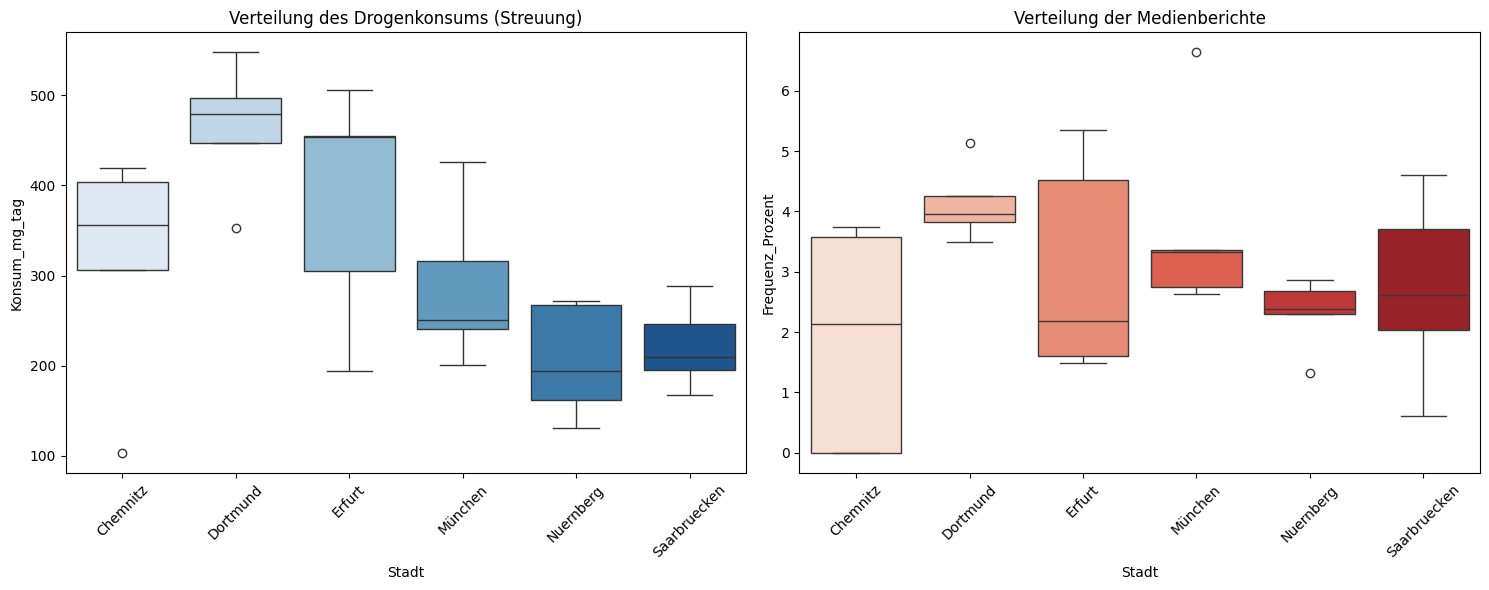

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Drogenkonsum Verteilung
sns.boxplot(data=df, x="Stadt", y="Konsum_mg_tag", ax=axes[0], palette="Blues")
axes[0].set_title("Verteilung des Drogenkonsums (Streuung)")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Medienberichte Verteilung
sns.boxplot(data=df, x="Stadt", y="Frequenz_Prozent", ax=axes[1], palette="Reds")
axes[1].set_title("Verteilung der Medienberichte")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

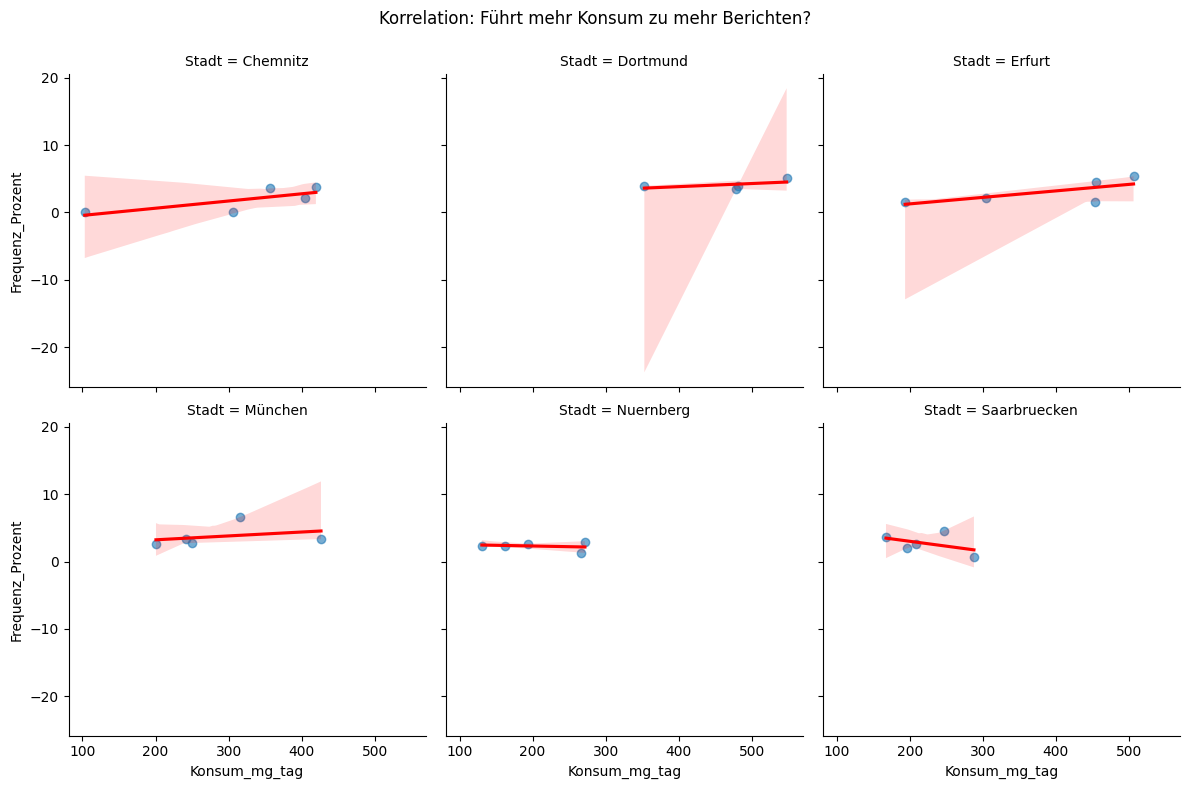

In [70]:
# Wir nutzen lmplot, das zeichnet automatisch eine Regressionsgerade ein
# col="Stadt" erstellt für jede Stadt ein eigenes kleines Bild
sns.lmplot(
    data=df, 
    x="Konsum_mg_tag", 
    y="Frequenz_Prozent", 
    col="Stadt", 
    col_wrap=3,       # 3 Bilder pro Zeile
    height=4, 
    aspect=1,
    line_kws={'color': 'red'}, # Farbe der Trendlinie
    scatter_kws={'alpha': 0.6} # Transparenz der Punkte
)

plt.subplots_adjust(top=0.9)
plt.suptitle("Korrelation: Führt mehr Konsum zu mehr Berichten?")
plt.show()

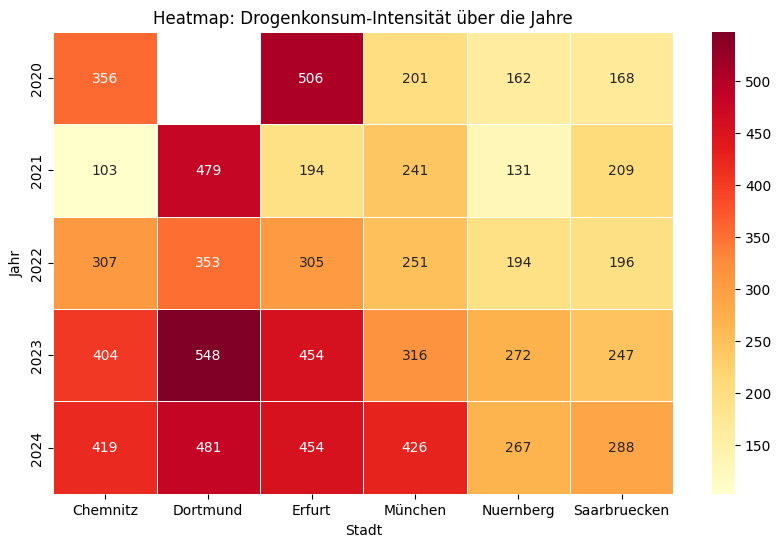

In [71]:
# Pivot-Tabelle erstellen für die Heatmap (Jahre als Zeilen, Städte als Spalten)
heatmap_data = df.pivot(index="Jahr", columns="Stadt", values="Konsum_mg_tag")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=.5)
plt.title("Heatmap: Drogenkonsum-Intensität über die Jahre")
plt.show()